# Charts

Charts are a powerful tool for understanding and interpreting data. Most charts use aggregations to represent the dataset, and others downsample the data to represent a subset.

First, let's import the modules needed for this notebook.

In [1]:
# VerticaPy
from verticapy.datasets import load_titanic, load_iris, load_world, load_amazon
import verticapy as vp

# Numpy & Matplotlib
import numpy as np
import matplotlib.pyplot as plt

Let's start with pies and histograms. Drawing the pie or histogram of a categorical column in VerticaPy is quite easy.

In [2]:
vp.set_option("plotting_lib", "highcharts")
vdf = load_titanic()
vdf["pclass"].bar()

In [3]:
vdf["pclass"].pie()

These methods will draw the most occurent categories and merge the others. To change the number of elements, you can use the 'max_cardinality' parameter.

In [4]:
vdf["home.dest"].bar()

In [5]:
vdf["home.dest"].bar(max_cardinality = 5)

When dealing with numerical data types, the process is different. Vertica needs to discretize the numerical features to draw them. You can choose the bar width ('h' parameter) or let VerticaPy compute an optimal width using the Freedman-Diaconis rule.

In [6]:
vdf["age"].hist()

In [7]:
vdf["age"].hist(h = 5)

You can also change the occurences by another aggregation with the 'method' and 'of' parameters.

In [8]:
vdf["age"].hist(method = "avg", of = "survived")

VerticaPy uses the same process for other graphics, like 2-dimensional histograms and bar charts.

In [9]:
vdf.bar(["pclass", "survived"])

In [10]:
vdf.hist(["fare", "pclass"],
         method = "avg",
         of = "survived")

Pivot tables give us aggregated information for every category and are more powerful than histograms or bar charts.

In [11]:
vdf.pivot_table(["pclass", "fare"], 
                method = "avg",
                of = "survived",
                fill_none = np.nan)

Box plots are useful for understanding statistical dispersion.

In [12]:
vdf.boxplot(columns = ["age", "fare"])

In [13]:
vdf["age"].boxplot()

Scatter and bubble plots are also useful for identifying patterns in your data. Note, however, that these methods don't use aggregations; VerticaPy downsamples the data before plotting. You can use the 'max_nb_points' to limit the number of points and avoid unnecessary memory usage.

In [14]:
vdf = load_iris()
vdf.scatter(["SepalLengthCm", "PetalWidthCm"], 
            by = "Species", 
            max_nb_points = 1000)

In [15]:
vdf.scatter(["SepalLengthCm", "PetalWidthCm", "SepalWidthCm"], 
            by = "Species", 
            max_nb_points = 1000)

In [16]:
vdf.scatter(["SepalLengthCm", "PetalWidthCm"], 
            size = "SepalWidthCm",
            by = "Species",
            max_nb_points = 1000)

In [17]:
help(vdf.scatter)

Help on method scatter in module verticapy.core.vdataframe._plotting:

scatter(columns: Annotated[Union[str, list[str]], 'STRING representing one column or a list of columns'], by: Optional[str] = None, size: Optional[str] = None, cmap_col: Optional[str] = None, max_cardinality: int = 6, cat_priority: Union[NoneType, Annotated[Union[bool, float, str, datetime.timedelta, datetime.datetime], 'Python Scalar'], Annotated[Union[list, numpy.ndarray], 'Array Like Structure']] = None, max_nb_points: int = 20000, dimensions: tuple = None, bbox: Optional[tuple] = None, img: Optional[str] = None, chart: Union[ForwardRef('PlottingBase'), ForwardRef('TableSample'), ForwardRef('Axes'), ForwardRef('mFigure'), ForwardRef('Highchart'), ForwardRef('Highstock'), ForwardRef('Figure'), NoneType] = None, **style_kwargs) -> Union[ForwardRef('PlottingBase'), ForwardRef('TableSample'), ForwardRef('Axes'), ForwardRef('mFigure'), ForwardRef('Highchart'), ForwardRef('Highstock'), ForwardRef('Figure')] method of v

Hexbin plots can be useful for generating heatmaps. These summarize data in a similar way to scatter plots, but compute aggregations to get the final results.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

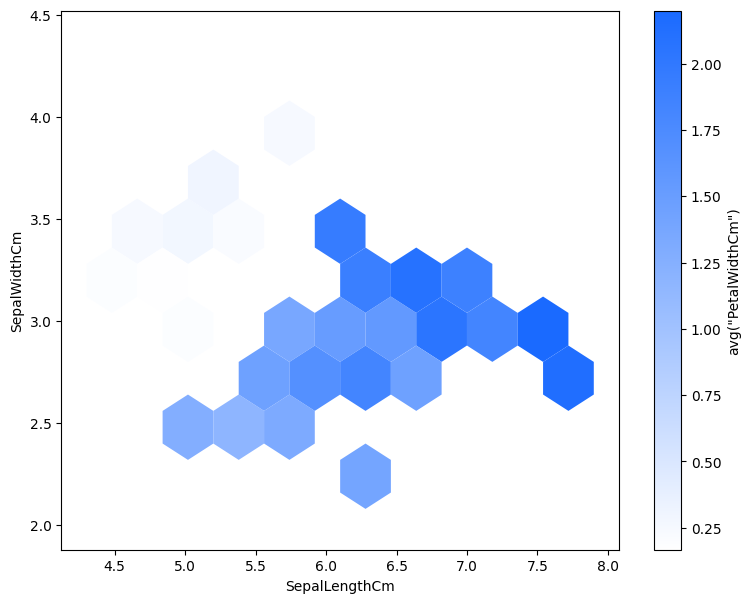

In [18]:
vp.set_option("plotting_lib", "matplotlib")
vdf.hexbin(["SepalLengthCm", "SepalWidthCm"], 
            method = "avg", 
            of = "PetalWidthCm")

Hexbin, scatter, and bubble plots also allow you to provide a background image. The dataset used below is available <a href="../../../data/africa_education.csv">here</a>.

<AxesSubplot:xlabel='lon', ylabel='lat'>

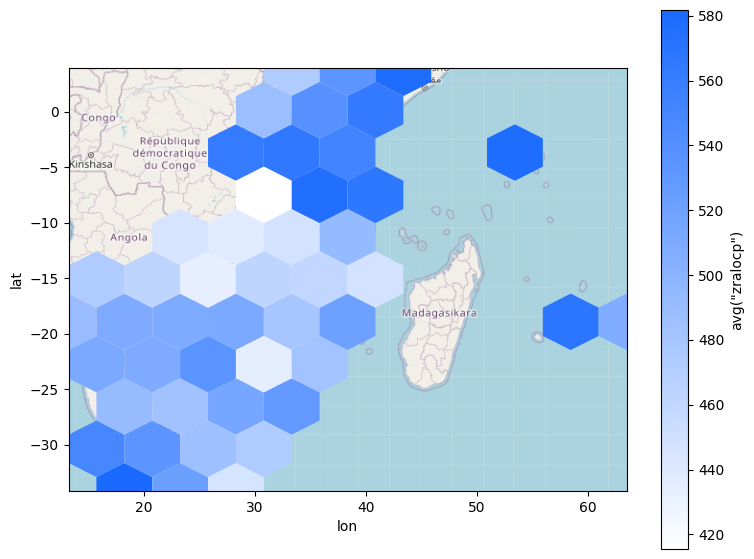

In [19]:
africa = vp.read_csv("data/africa_education.csv")
# displaying avg students score in Africa
africa.hexbin(["lon", "lat"],
              method = "avg",
              of = "zralocp",
              img = "img/africa.png")

It is also possible to use SHP datasets to draw maps.

<AxesSubplot:xlabel='lon', ylabel='lat'>

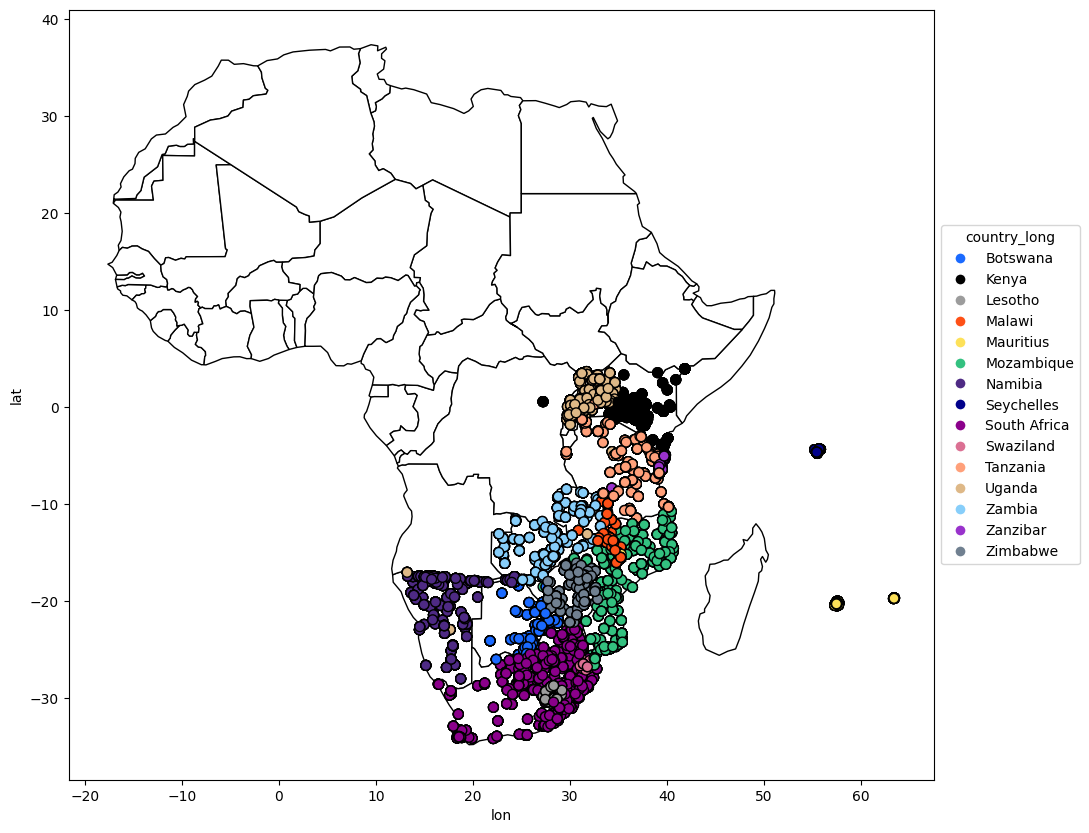

In [20]:
# Africa Dataset
africa_world = load_world()
africa_world = africa_world[africa_world["continent"] == "Africa"]
ax = africa_world["geometry"].geo_plot(color = "white",
                                       edgecolor='black',)

# displaying schools in Africa
africa.scatter(["lon", "lat"],
               by = "country_long",
               ax = ax,
               max_cardinality = 100)

Time-series plots are also available with the 'plot' method.

5737 elements were filtered


<AxesSubplot:xlabel='date', ylabel='number'>

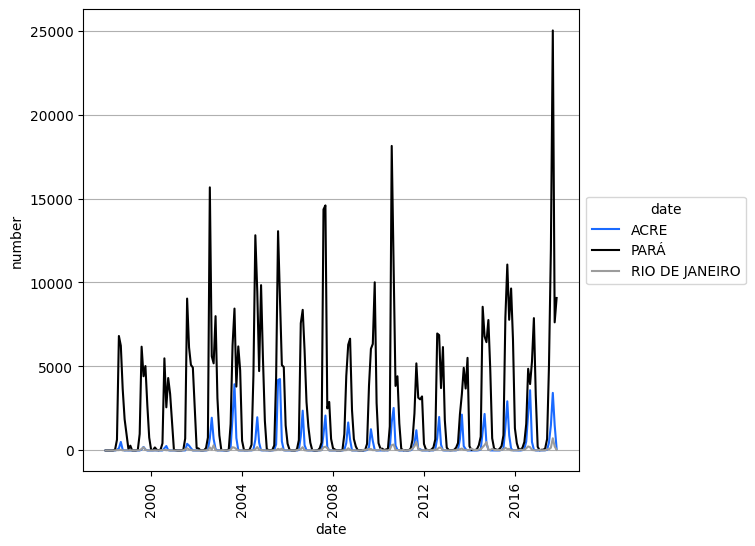

In [21]:
vdf = load_amazon()
vdf.filter(vdf["state"]._in(['ACRE', 'RIO DE JANEIRO', 'PARÁ']))
vdf["number"].plot(ts = "date", by = "state")

Since time-series plots do not aggregate the data, it's important to choose the correct 'start_date' and 'end_date'.

<AxesSubplot:xlabel='date', ylabel='number'>

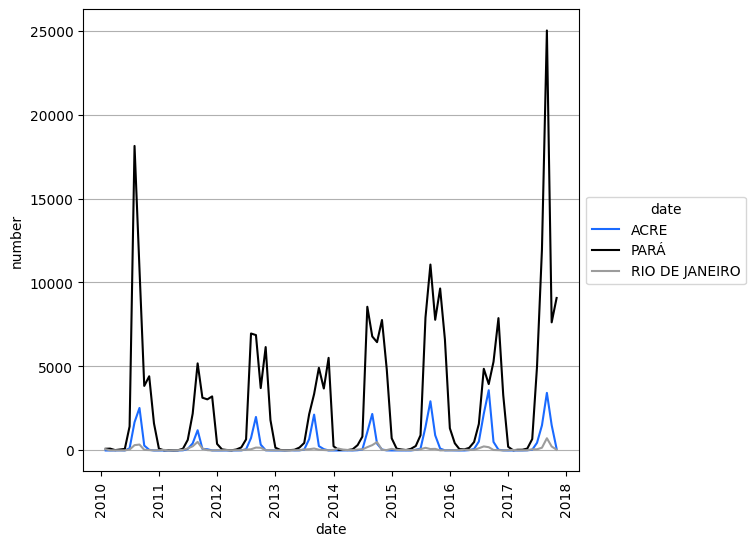

In [22]:
vdf["number"].plot(ts = "date", 
                   by = "state", 
                   start_date = "2010-01-01")

## Plotting Libraries

Currently there are three plotting libraries that are integarted with VerticaPy:
- Plotly
- Highcharts
- Matplotlib

There are various use-cases for the above mentioned different plotting libraries.

For example, in matplotlib, each graphical function has a parameter 'ax' used to draw customized graphics. You can use this to draw multiple plots on the same axes.

  0%|          | 0/13 [00:00<?, ?it/s]

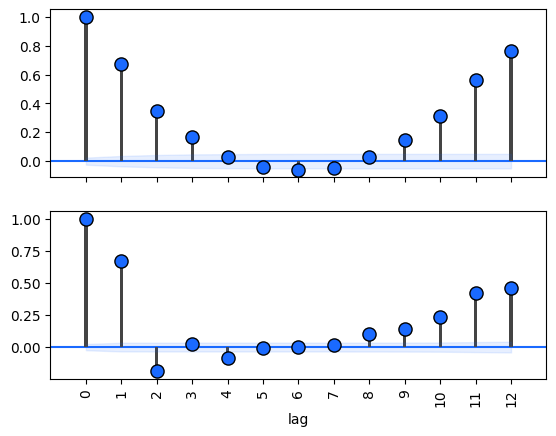

In [23]:
vp.set_option("plotting_lib","matplotlib")
amazon = load_amazon()
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
amazon.acf(column = "number",
           ts = "date",
           by = ["state"],
           p = 12,
           ax = ax1)
ax1.set_xticklabels([])
ax1.set_xlabel("")
amazon.pacf(column = "number",
            ts = "date",
            by = ["state"],
            p = 12,
            ax = ax2)
plt.show()

You can customize your charts using come common input parameters like colors, height and width.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

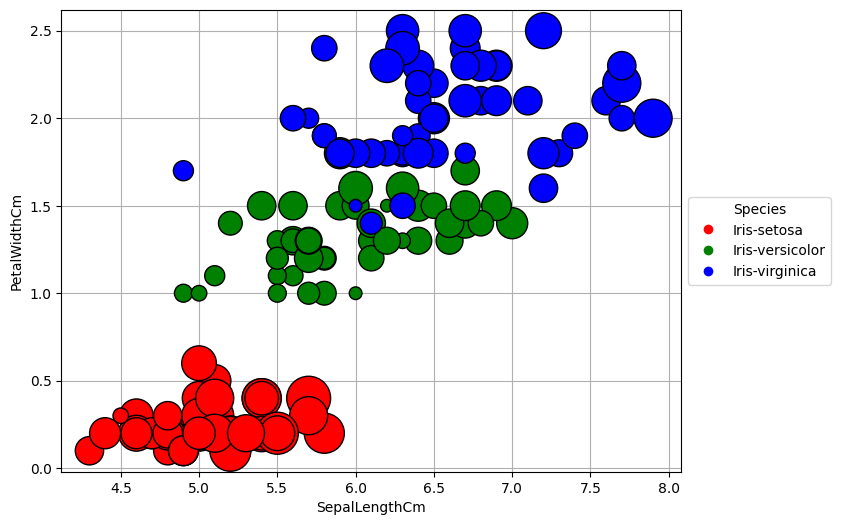

In [24]:
vdf = load_iris()
vdf.scatter(["SepalLengthCm", "PetalWidthCm"], 
            size = "SepalWidthCm",
            by = "Species", 
            max_nb_points = 1000,
            colors = ["red", "green", "blue"],)

**Note:** Other parameters that are specific to each plotting library are also possible. You can read the documentation of the plotting libraries to get more details.

Switching between the libraries is very convenient using the following syntax:

In [ ]:
vp.set_option("plotting_lib","highcharts")

You can also draw responsive graphics with **Highchart** or **Plotly** integration:

In [25]:
vdf.scatter(["SepalLengthCm", "PetalWidthCm"], 
            by = "Species", 
            max_nb_points = 1000,
            colors = ["red", "green", "blue"],)

Graphics are powerful tools and can help us understand and visualize trends in our data.